In [198]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
import sympy
#히스토그램 그리기

from sympy import Integral,  Symbol , pprint
#sympy


# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [199]:
from sympy import Integral,  Symbol , pprint ,solve

x = Symbol('x')
f = 2 * x

f_x_m = f *x

pprint(Integral(f_x_m, x).doit()) #이쁘게 출력
print('===')

mean_x = Integral(f_x_m, (x, (0, 1))).doit()
print("평균 : {}".format(mean_x)) #적분변수 , 아래끝 , 위끝

var_x = Integral(f_x_m *x, (x, (0, 1))).doit() - math.pow(mean_x , 2)

print("분산 : {}".format(var_x))

   3
2⋅x 
────
 3  
===
평균 : 2/3
분산 : 0.0555555555555556


In [200]:
#P(X<=a) = P(Z<= (a-평균)/표준편차)) = 1/4
#(a-평균)/표준편차) = X_r
X_r = scipy.stats.norm.ppf(0.25)
print(X_r)
print(var_x)
print(math.sqrt(var_x))
equation = (x- mean_x) / math.sqrt(var_x) - X_r
d = solve(equation)
print(d)

-0.6744897501960817
0.0555555555555556
0.2357022603955159
[0.507687907931844]


In [201]:
k = sympy.Symbol('k')
sol_k = 2*k*(1/2) -1
k_sol = solve(sol_k)
print(k_sol)

[1.00000000000000]


In [202]:
from sympy import Integral,  Symbol , pprint ,solve

x = Symbol('x')
f_1 =  x
f_2 = -x +2
f_x_1_m = f_1 *x
f_x_2_m = f_2 *x

mean_x = Integral(f_x_1_m, (x, (0, 1))).doit() + Integral(f_x_2_m, (x, (1, 2))).doit()
print("평균 : {}".format(mean_x)) #적분변수 , 아래끝 , 위끝

var_x = Integral(f_x_1_m*x, (x, (0, 1))).doit() + Integral(f_x_2_m*x, (x, (1, 2))).doit() - math.pow(mean_x, 2)

print("분산 : {}".format(var_x)) #적분변수 , 아래끝 , 위끝

평균 : 1
분산 : 0.166666666666667


In [203]:
x_0_6 = round((0.6-(mean_x)) / math.sqrt(var_x),8)
x_0 = round( (0-mean_x) / math.sqrt(var_x) , 4)
print(x_0_6)
print(x_0)
print(scipy.stats.norm.cdf(-0.97979590))

-0.97979590
-2.4495
0.16359343818253824


In [204]:
x_0_1_5 = round((1.5-(mean_x)) / math.sqrt(var_x),8)
x_0_5 = round( (0.5-mean_x) / math.sqrt(var_x) , 4)
print(x_0_1_5)
print(x_0_5)
print(scipy.stats.norm.cdf(1.2247) - scipy.stats.norm.cdf(-1.2247) )

1.22474487
-1.2247
0.7793117258581086


In [205]:
x_0_2 = round((2-(mean_x)) / math.sqrt(var_x),8)
x_0_1_2 = round( (1.2-mean_x) / math.sqrt(var_x) , 4)
print(x_0_2)
print(x_0_1_2)
print(scipy.stats.norm.cdf(2.4494) - scipy.stats.norm.cdf(0.4899) )

2.44948974
0.4899
0.3049476096214827


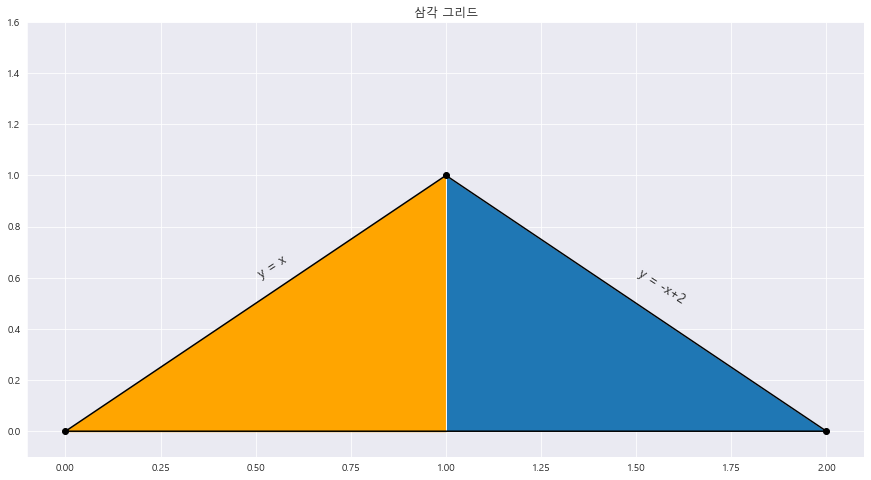

In [206]:
import matplotlib.tri as mtri

fig = plt.figure(figsize=(15,8))
x = np.array([0,1,2]) #삼각형의 x좌표
y = np.array([0,1 , 0]) #삼각형의 y좌표

triangles = [[0,1,2]] #삼각형의 점 개수
triang = mtri.Triangulation(x,y , triangles)

plt.title("삼각 그리드")
plt.triplot(triang , 'ko-')
plt.fill_between(x , x , 0 , where = (x<= 1) & (x>=0) , color = 'orange')
plt.fill_between(x , -x+2 , 0 , where =  (x>=1) & (x<= 2) )

plt.xlim(-0.1 , 2.1)
plt.ylim(-0.1 , 1.6)

plt.text(0.5 , 0.6 , 'y = x' , fontsize = 13 , rotation = 33)
plt.text(1.5 , 0.5 , 'y = -x+2' , fontsize = 13 , rotation = -33)
plt.show()

In [207]:
a_x= np.arange(0,20,.1) # len(a_x) = 20

a_y = np.full((1,len(a_x)) , 0.02) #1행 20열값을 0.02로 가득채워라
print(a_y)

A = pd.DataFrame([a_x , *a_y])
A= A.T
a_x= np.arange(20,30,.1) # len(a_x) = 20

a_y = np.full((1,len(a_x)) , 0.04) #1행 20열값을 0.02로 가득채워라

B= pd.DataFrame([a_x , *a_y])
B = B.T

a_x= np.arange(30,41,.1) # len(a_x) = 20

a_y = np.full((1,len(a_x)) , 0.02) #1행 20열값을 0.02로 가득채워라

C= pd.DataFrame([a_x , *a_y])
C = C.T

A = pd.concat([A,B,C]).reset_index()
A = A.iloc[ : , 1:]
A

[[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
  0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
  0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
  0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
  0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
  0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
  0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
  0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
  0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
  0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
  0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
  0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
  0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
  0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.

,0,1
0,0.0,0.02
1,0.1,0.02
2,0.2,0.02
3,0.3,0.02
4,0.4,0.02
...,...,...
405,40.5,0.02
406,40.6,0.02
407,40.7,0.02
408,40.8,0.02


Text(29, 0.015, 'P(X>=35) = 0.1')

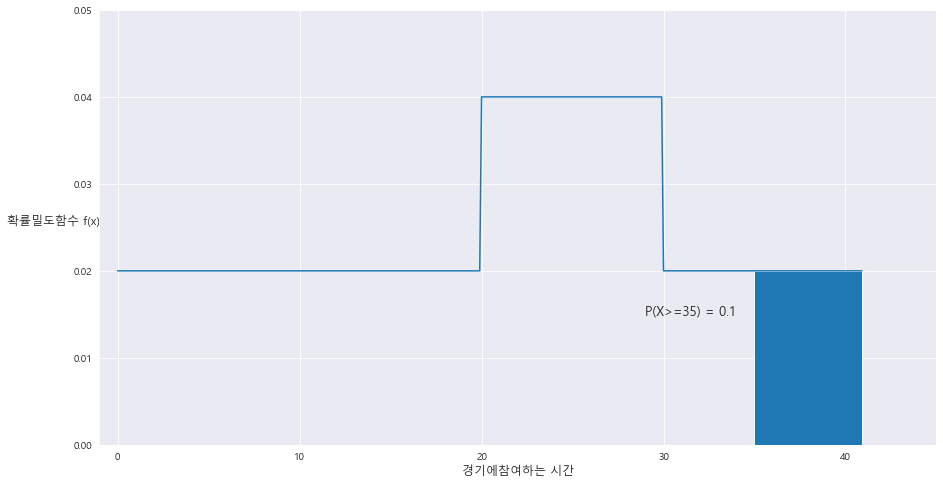

In [208]:
fig = plt.figure(figsize=(15,8))

# ax = sns.distplot(x = A[0] , y=A[1])
ax= sns.lineplot(x= A[0] , y= A[1])
ax.set_xlim(-1 , 45)
ax.set_ylim(0 , 0.05)
ax.set_xlabel('경기에참여하는 시간' , fontsize = 12)
ax.set_ylabel('확률밀도함수 f(x)' , fontsize= 12 , rotation=0 , labelpad = 20)


ax.fill_between(A[0] , A[1] , 0 , where =  (A[0]>=35))

area = (40-35) * 0.02
ax.text(29 , 0.015 , 'P(X>=35) = {}'.format(area) , fontsize= 13)

Text(26, 0.015, 'P(X<=25) = 0.6')

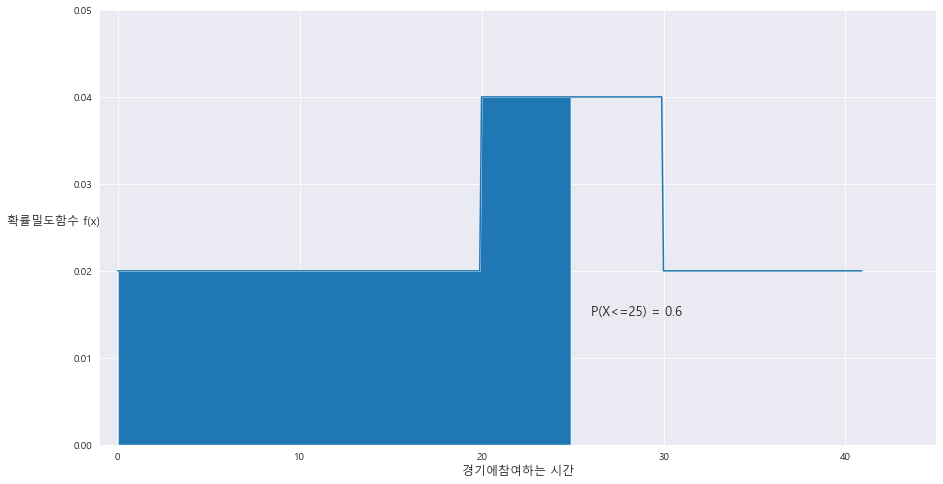

In [211]:
fig = plt.figure(figsize=(15,8))

# ax = sns.distplot(x = A[0] , y=A[1])
ax= sns.lineplot(x= A[0] , y= A[1])
ax.set_xlim(-1 , 45)
ax.set_ylim(0 , 0.05)
ax.set_xlabel('경기에참여하는 시간' , fontsize = 12)
ax.set_ylabel('확률밀도함수 f(x)' , fontsize= 12 , rotation=0 , labelpad = 20)


ax.fill_between(A[0] , A[1] , 0 , where =  (A[0]<=25))

area = (25-20) * 0.04 + (20*0.02)
ax.text(26 , 0.015 , 'P(X<=25) = {}'.format(round(area,2)) , fontsize= 13)

Text(8, 0.015, 'P(15<=X<=35) = 0.6')

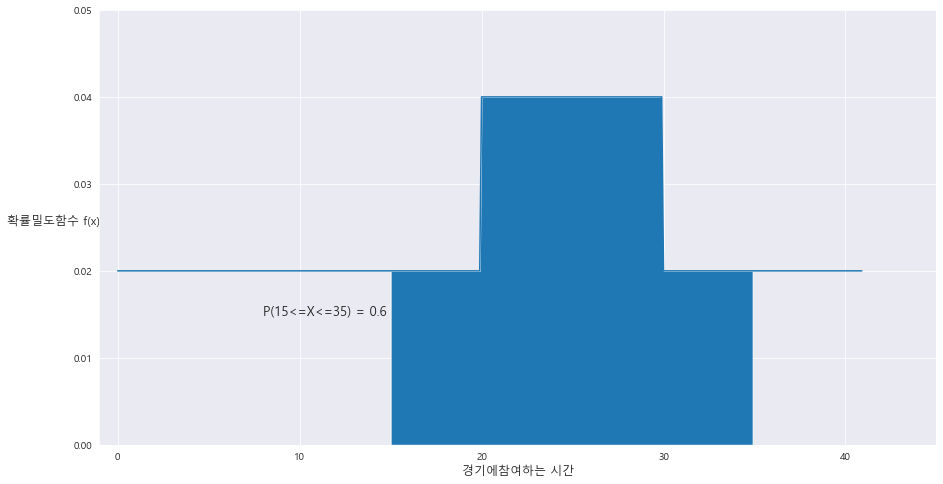

In [214]:
fig = plt.figure(figsize=(15,8))

# ax = sns.distplot(x = A[0] , y=A[1])
ax= sns.lineplot(x= A[0] , y= A[1])
ax.set_xlim(-1 , 45)
ax.set_ylim(0 , 0.05)
ax.set_xlabel('경기에참여하는 시간' , fontsize = 12)
ax.set_ylabel('확률밀도함수 f(x)' , fontsize= 12 , rotation=0 , labelpad = 20)


ax.fill_between(A[0] , A[1] , 0 , where =  (A[0]<=35) & (A[0]>=15))

area = (30-20) * 0.04 + ((35-30)*0.02) + ((20-15) *0.02)
ax.text(8 , 0.015 , 'P(15<=X<=35) = {}'.format(round(area,2)) , fontsize= 13)